# Geometric Brownian Motion (GBM): Theory and Examples

## Definition

Let's say we have a timeseries of prices : $\{S(t), t=t_0, ..., t_n \}$. 
The returns (or log returns) are defined as $\{ R_j = \log S(t_j)/S(t_{j-1}), j=1, ..., n\}$, where $R_j$ are indep. r.v.'s: $R_j \sim \mathcal{N}\left(\mu \Delta_j, \sigma^2 \Delta_j \right)$ with $\Delta_j = t_j-t_{j-1}$. Then, $\log S(t)$ is a Brownian motion with drift $\mu$ and volatility $\sigma^2$.  

Another way to define a BM is through stochastic differential equations. Using the formal definition, we can write: 
\begin{align*}
d \log S(t) = \mu dt + \sigma dW(t)
\end{align*}

Dividing and multipying by dS(t) in both sides, we get: 
\begin{align*}
& \frac{1}{S(t)} dS(t) = \mu dt + \sigma dW(t) \\ 
& \Leftrightarrow dS(t) = \mu S(t)dt + \sigma S(t) dW(t)
\end{align*}

where $W(t)$ is a standard BM ($dW(t)$ is an infinitesimal increment of a standard BM/Wiener process) and $dS(t)$ infinitesimal increment in price.  


## Example 1: IPC historical data 

Let's first import some useful packages like pandas, matplotlib and statsmodels 

In [23]:
import pandas as pd
from pandas import Series
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from scipy import stats

Reading the data as dataframe using pandas 

In [24]:
# reading the historical data
df = pd.read_csv('IPC.csv')

We are interested in the price and the percentage change columns. To do that, we need to make some data manipulation. 

In [25]:
# select the price/change % columns 
price_list = []
change_list = []
for i in range(len(df['Price'])):
    price_list.append(float(df['Price'][i].replace(",", "")))
    change_list.append(float(df['Change %'][i][0:-1]))
    
# replace the price/change colums with corresponding lists
df['Price'] = price_list     
df['Change %'] = change_list 


Plot the two selected timeseries with respect to time

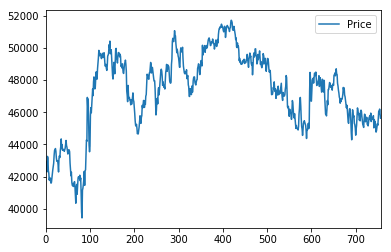

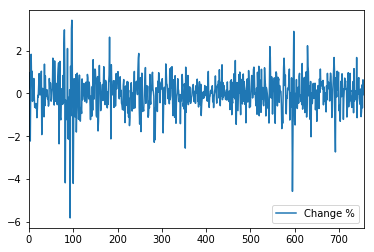

In [26]:
# plot prices with dates 
df.plot(y='Price')
df.plot(y='Change %') 

From the curves, we can expect the Price timeseries not to be stationary and that the percentage change is more
stable and so it is expected to be stationary. This is not a rigorous analysis though, some statistical tests can
be performed to have more evidence on stationarity of timeseries. One can apply the augmented Dickey-Fuller test for stationarity.

Let's also plot the histograms 

Text(0.5,1,'Change %')

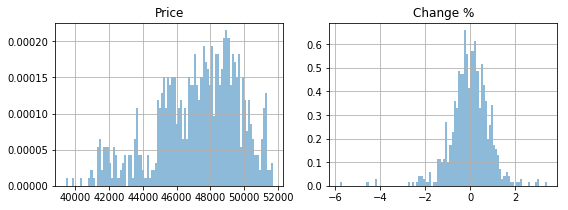

In [27]:
# histograms 
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)
plt.figure(figsize=(9, 3))
plt.subplot(121)
df['Price'].hist(**kwargs)
plt.title('Price')

plt.subplot(122)
df['Change %'].hist(**kwargs)
plt.title('Change %')

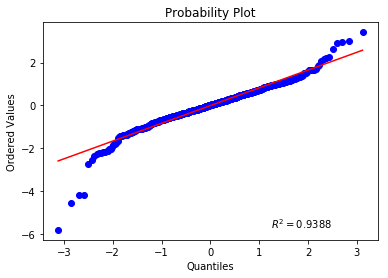

In [32]:
res = stats.probplot(df['Change %'].values, plot=plt)

We can see from the QQ plot that the Gaussian distribution fits the data for most values except for the tails. It seems that the returns have fat tail distribution. In fact, the extreme values of returns are much higher of what is predicted by the Gaussian distribution. 
The QQ plot should look like the following plot generated for artificial Gaussian data. 

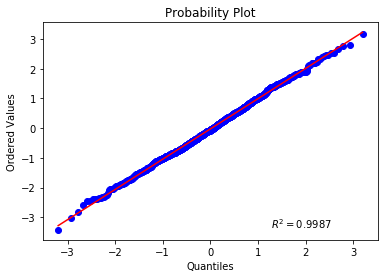

In [38]:
x = np.random.randn(1000)
res = stats.probplot(x, plot=plt)

## Example 2: Euro to USD conversion rates 

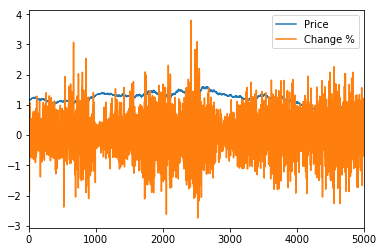

In [11]:
# read the conversion rates data 
df = pd.read_csv('EUR_USD_Historical_ Data.csv')

# plot price and Change % data 
df['Price'].plot(label='Price')
df['Change %'].apply(lambda x: float(x[:-1])).plot(label='Change %')
plt.legend()

Text(0.5,1,'Change %')

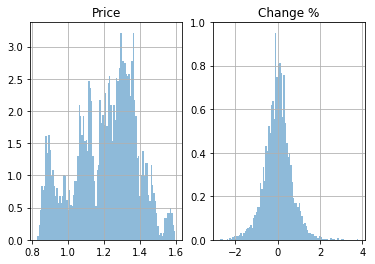

In [12]:
# plot histogram of prices
plt.subplot(121)
df['Price'].hist(**kwargs)
plt.title('Price')

# plot histogram of the percentage change column 
plt.subplot(122)
df['Change %'].apply(lambda x: float(x[:-1])).hist(**kwargs)
plt.title('Change %')

## Check the Gaussianity using QQ plots 

In [17]:
x

array([ 6.60027586e-01, -1.52290770e+00, -1.04438963e+01,  2.78763451e+00,
       -1.10576854e+00, -1.43014425e-01,  1.10673214e-01, -1.42156549e+00,
       -1.40233794e+00,  1.52625379e-01,  2.31338760e+00, -3.45175050e-01,
        6.42166350e-01,  5.18350058e-01,  1.48645246e+00,  6.28029608e-01,
        1.48237793e+00,  1.62983658e+00,  1.20571896e-01, -2.30525679e+00,
       -5.89581245e-02, -1.62023135e+00, -1.31254160e-01, -1.56150547e+00,
        4.87471310e-01, -2.07132333e+00, -2.90743065e-01,  1.58347103e-01,
        8.66693118e-01,  1.67557260e+00,  2.22053320e+00, -2.82927441e+00,
       -1.01103119e-01,  1.06579549e+00,  7.30584366e-03,  4.23065425e-01,
       -5.32485350e-01,  1.08775913e+00,  3.45020721e-02, -2.33535931e-01,
        1.14944629e+00,  2.06419073e+00, -1.49878986e+00,  1.00578032e+00,
       -8.97748823e-01, -9.35500618e-02, -4.99696893e-01,  5.45435638e-01,
       -1.16045876e-01,  1.01949197e+00,  3.83993005e-02,  1.62046721e+00,
       -9.26744809e-01,  